**Author**: Lulof Pirée

**Date**: June 2022

--------------------------------------------------------------------------------
Copyright (C) 2022 Lulof Pirée

This file is part of the snakes_spn program.

This program is free software:
you can redistribute it and/or modify it under the terms
of the GNU General Public License as published by the Free Software Foundation,
either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY;
without even the implied warranty of MERCHANTABILITY
or FITNESS FOR A PARTICULAR PURPOSE.
See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.
If not, see <https://www.gnu.org/licenses/>.

--------------------------------------------------------------------------------
## File content
Personal practice with Matplotlib to make a plot-of-plots.

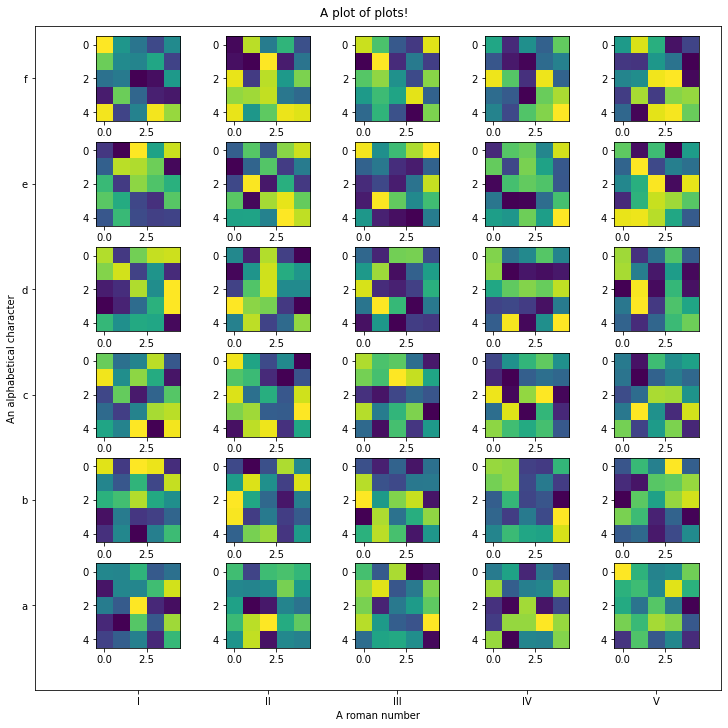

In [2]:
from matplotlib.transforms import Bbox
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import numpy as np


num_rows=6
num_cols=5


table = [[np.random.rand(5, 5) for col in range(num_cols)]
    for row in range(num_rows)]

rows = ["a", "b", "c", "d", "e", "f"]
cols = ["I", "II", "III", "IV", "V"]

fig, superax = plt.subplots(figsize=(10, 10))
fig.suptitle("A plot of plots!")
superax.set_xlabel("A roman number")
superax.set_ylabel("An alphabetical character")
superax.set_xlim([0.2, num_cols+0.5])
superax.set_ylim([0.2, num_rows+0.5])
superax.set_xticks([x for x in range(1, num_cols+1)])
superax.set_yticks([y for y in range(1, num_rows+1)])
superax.set_xticklabels(cols)
superax.set_yticklabels(rows)

fig.execute_constrained_layout()

for row in range(num_rows):
    for col in range(num_cols):
        bb_data_ax = Bbox.from_bounds(col+0.60,row+0.60, 0.8, 0.8)
        disp_coords = superax.transData.transform(bb_data_ax)
        fig_coords_ax = fig.transFigure.inverted().transform(disp_coords)
        bb_ax = Bbox(fig_coords_ax)
        
        ax = fig.add_axes(bb_ax)
        ax.imshow(table[row][col])